# Task-2                                                                           !
## The sparks foudation - GRIP       

### To Explore Supervised machine learning               
#### By- Arpit Gupta



# Import the Files and Read the data


In [1]:
#import all librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
#load the dataset
data=pd.read_csv("http://bit.ly/w-data")
print("Data is retrived successfully")

Data is retrived successfully


In [3]:
#print the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Check the data size
data.shape

(25, 2)

In [5]:
#To get an idea of numerical variables
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plot the visualizations

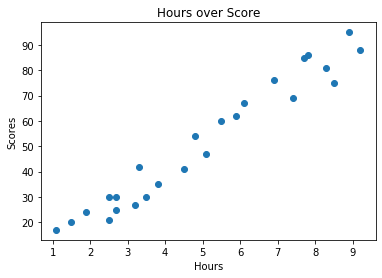

In [6]:
#plot the visuals
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title("Hours over Score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

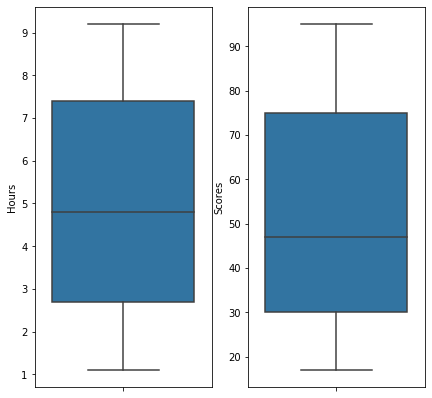

In [7]:
#plot the box plot for both the variables to check the outliers
fig,axes=plt.subplots(1,2,figsize=(7,7))
sns.boxplot(data['Hours'],orient='vertical',ax=axes[0])

sns.boxplot(data['Scores'],orient='vertical',ax=axes[1])

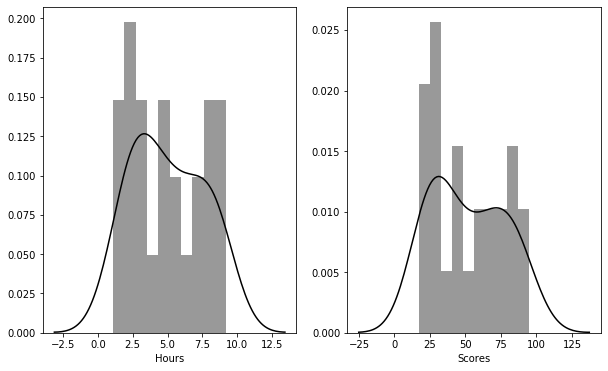

In [8]:
#Plot Histogram from both the variables to check variablity
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.distplot(data["Hours"],bins=10,color="black",ax=axes[0])
sns.distplot(data["Scores"],bins=10,color="black",ax=axes[1])

In [9]:
# Separate the dependent and independent variabels
A=data.iloc[:, :1].values
B=data.iloc[:, 1].values


In [10]:
from sklearn.model_selection import train_test_split

# Split the data to test and train

In [11]:
#Train the data
X_train,X_test,y_train,y_test=train_test_split(A,B,test_size=0.3,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Get the linear regression on data
R= LinearRegression()
R.fit(X_train,y_train)
print("Model is trained")

Model is trained


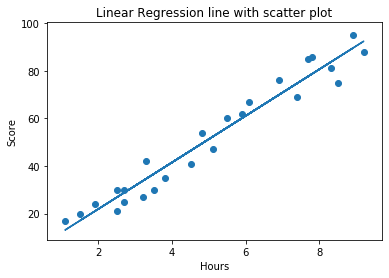

In [14]:
#Plot the regression line
Line= R.coef_ *A + R.intercept_
plt.plot(A,Line)
plt.scatter(A,B)
plt.title("Linear Regression line with scatter plot")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

# Predict the Score based on Hours Studies

In [15]:
#Predict the values for test data
y_predicted=R.predict(X_test)

In [16]:
print(y_predicted)
print(y_test)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]
[20 27 69 30 62 35 24 86]


In [17]:
#Make a dataframe of test vaiables and predicted to value to check the error
df =pd.DataFrame({"Hour":X_test.flatten(),'Actual':y_test,'Predicted':y_predicted})

In [18]:
df

,Hour,Actual,Predicted
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


In [19]:
#Find out the score for 9 hour studying student
Hours=np.array([9.25]).reshape(1,-1)
print(Hours)
p=R.predict(Hours)
print(p)

[[9.25]]
[92.91505723]


# Evaluation of Model

In [20]:

#Check the error of predicted value
from sklearn import metrics
print("Error is :",metrics.mean_absolute_error(y_test,y_predicted))

Error is : 4.419727808027652


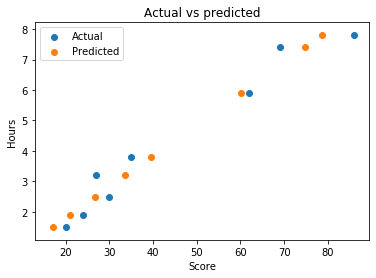

In [21]:
#Compare predicted and actual values by scatter plot
plt.scatter(x=df.Actual,y=df.Hour)
plt.scatter(x=df.Predicted,y=df.Hour)
plt.title("Actual vs predicted")
plt.xlabel("Score")
plt.ylabel("Hours")
plt.legend(labels=["Actual","Predicted"])

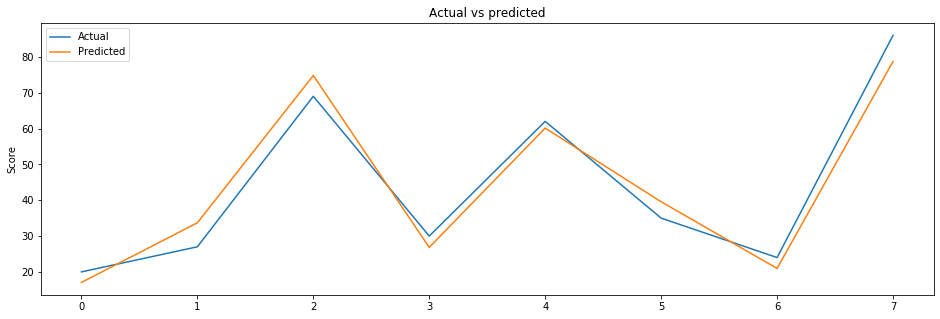

In [22]:
#Compare predicted and actual values by Line plot
plt.figure(figsize=(16,5))
plt.plot(df.Actual)
plt.plot(df.Predicted)
I=df.Actual.index.tolist()
plt.title("Actual vs predicted")
plt.ylabel("Score")
plt.legend(labels=["Actual","Predicted"])

# Model 2 Regression and prediction

In [23]:
import statsmodels.api as sm

In [24]:
model = sm.OLS(B,A).fit()

In [25]:
pred=model.predict(A)

In [26]:
print_model=model.summary()

In [27]:
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):                    6.10e-26
Time:                        13:43:35   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

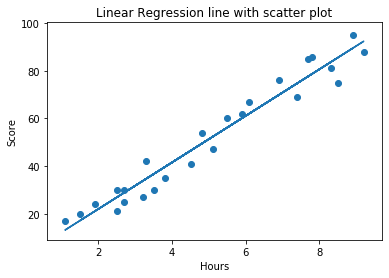

In [28]:
Line2=2.4837 +(9.7758)*A
plt.plot(A,Line2)
plt.scatter(A,B)
plt.title("Linear Regression line with scatter plot")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [29]:
df3= data[["Scores","Hours"]]

In [32]:
df3.loc["predicted"]= 2.4837 +(9.7758)*data["Hours"]


C:\Users\arpit\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
df3

,Scores,Hours,predicted
0,21.0,2.5,26.92320
1,47.0,5.1,52.34028
2,27.0,3.2,33.76626
3,75.0,8.5,85.57800
4,30.0,3.5,36.69900
5,20.0,1.5,17.14740
6,88.0,9.2,92.42106
7,60.0,5.5,56.25060
8,81.0,8.3,83.62284
9,25.0,2.7,28.87836


In [36]:
#Check the error of predicted value
from sklearn import metrics
print("Error is :",metrics.mean_absolute_error(df3["Scores"].dropna(),df3["predicted"].dropna()))


Error is : 4.9728032


In [34]:
Score_of_student=2.4837 +(9.7758)*9.25
print(Score_of_student)

92.90985
